In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Cancer_Data.csv')

In [ ]:
df.shape

(569, 33)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df=df.drop(['Unnamed: 32'],axis=1)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'] = df['diagnosis'].replace({'M': 1,'B':0})

In [ ]:
y = df['diagnosis']
x=df.drop(['diagnosis'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x , y , random_state=101, stratify=y, test_size=0.25)

In [ ]:
y_train.value_counts(normalize=True)

0    0.626761
1    0.373239
Name: diagnosis, dtype: float64

In [ ]:
y_valid.value_counts(normalize=True)

0    0.629371
1    0.370629
Name: diagnosis, dtype: float64

In [ ]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#creating the decision tree
dt_model = DecisionTreeClassifier(criterion ="gini",random_state = 10,max_depth=3, min_samples_leaf=5)

In [ ]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=10)

In [ ]:
dt_model.score(x_train,y_train)

0.9671361502347418

In [ ]:
dt_model.score(x_valid,y_valid)

0.9230769230769231

In [ ]:
dt_model.predict_proba(x_valid)

array([[0.98780488, 0.01219512],
       [0.        , 1.        ],
       [0.98780488, 0.01219512],
       [0.98780488, 0.01219512],
       [0.98780488, 0.01219512],
       [0.98780488, 0.01219512],
       [0.98780488, 0.01219512],
       [0.        , 1.        ],
       [0.98780488, 0.01219512],
       [0.98780488, 0.01219512],
       [0.        , 1.        ],
       [0.98780488, 0.01219512],
       [0.        , 1.        ],
       [0.22222222, 0.77777778],
       [0.        , 1.        ],
       [0.98780488, 0.01219512],
       [0.98780488, 0.01219512],
       [0.        , 1.        ],
       [0.98780488, 0.01219512],
       [0.98780488, 0.01219512],
       [0.98780488, 0.01219512],
       [0.98780488, 0.01219512],
       [0.        , 1.        ],
       [0.98780488, 0.01219512],
       [0.98780488, 0.01219512],
       [0.        , 1.        ],
       [0.98780488, 0.01219512],
       [0.98780488, 0.01219512],
       [0.98780488, 0.01219512],
       [0.98780488, 0.01219512],
       [0.

In [ ]:
y_pred= dt_model.predict_proba(x_valid)[: ,1]

In [ ]:
new_y =[]
for i in range (len(y_pred)):
    if y_pred[i]< 0.6:
      new_y.append(0)
    else:
      new_y.append(1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_valid,new_y)

0.9230769230769231

In [ ]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
  dt_model =DecisionTreeClassifier(max_depth=depth, random_state=10)
  dt_model.fit(x_train,y_train)
  train_accuracy.append(dt_model.score(x_train,y_train))
  validation_accuracy.append(dt_model.score(x_valid,y_valid))

In [ ]:
trees= pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,"valid_acc":validation_accuracy})
trees.head()

,max_depth,train_acc,valid_acc
0,1,0.927230,0.895105
1,2,0.953052,0.916084
2,3,0.978873,0.923077
3,4,0.988263,0.930070
4,5,0.997653,0.930070


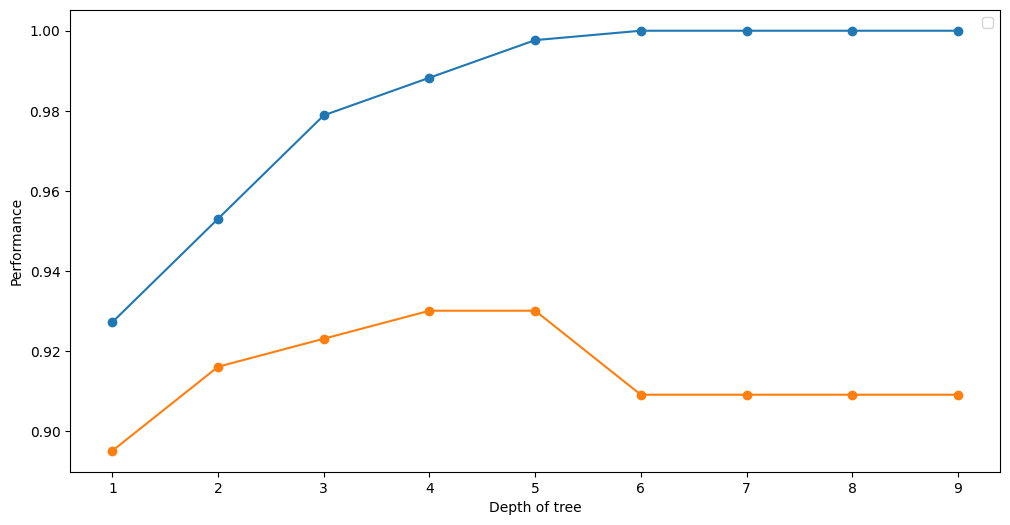

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
plt.plot(trees['max_depth'],trees['train_acc'],marker='o')
plt.plot(trees['max_depth'],trees['valid_acc'],marker='o')
plt.xlabel("Depth of tree")
plt.ylabel("Performance")
plt.legend()

In [ ]:
dt_model = DecisionTreeClassifier(criterion ="gini",random_state = 10,max_depth=5, min_samples_leaf=15)

In [ ]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, random_state=10)

In [ ]:
dt_model.score(x_train,y_train)

0.9436619718309859

In [ ]:
dt_model.score(x_valid,y_valid)

0.916083916083916

In [ ]:
from sklearn import tree

In [ ]:
!pip install  graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
decision_tree=tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=x_train.columns,max_depth=5,filled=True)

In [ ]:
!dot -Tpng tree.dot -o tree.png

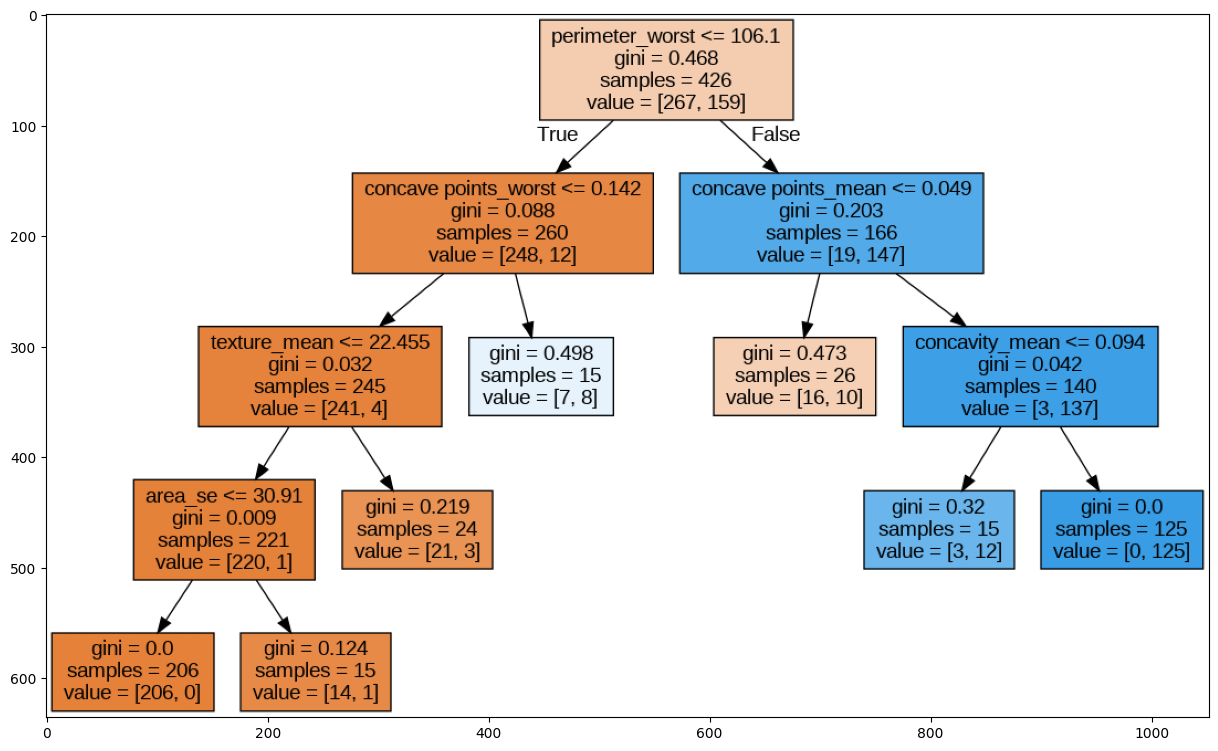

In [ ]:
image=plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)